Попробуем переписать часть логики, используя хорошо знакомые библиотеки для работы с настоящими газами.

In [129]:
import cantera as ct
import scipy.constants as C
import matplotlib.pyplot as plt
import CoolProp.CoolProp as cp
import importlib
import sm
import numpy as np
import pint
importlib.reload(sm)

<module 'sm' from 'c:\\Users\\emera\\OneDrive\\Code\\ss13\\sm.py'>

In [130]:
target_p = 1500e3
p0 = 101325 # out
target_delta = target_p - p0
s = ct.Solution('./xgm.yaml')

In [131]:
# Pipe-cold-line
total_cold = sum([1.5, 9, 1.5, 4, 7, 1.5, 1, 1, 1.5, 1.5, 1.5, 1.5, 1]) * .07 + sum( # <- pipes, -> devices
    [.2, .2, .7, .5, .5, .5, .5, .2])
total_hot = sum([1.96, 1.12, 7.35, 1.19]) + sum( # <- pipes, -> devices
    [.2, .2, .2])

In [10]:
cp.PhaseSI('T', 70, 'P', 101325, 'N2')

'liquid'

In [20]:
s.TPX = 293.15, 90*101325, 'N2: 1'
# q = ct.Quantity(s, mass = 104.8)

s.UV = s.u, s.v*12.22
q = ct.Quantity(s, mass = 104.8)
q.moles, q.volume, q.P/1e3

(3.740986649532377, 12.21862471381578, 746.256137479542)

In [23]:
q.moles * s.cp_mole

105922.29599485973

In [22]:
q.mass * s.cp

105922.29599485971

observations: full cold loop gets 732.5 kPa @14C; turning high-pump on gets 650+1150 @ 11 (and some on turbine)  

full hot loop is 160+400

+1 canister: 265@13 hot, 1302@9 cold; 638@15 scalding, 2165@9 cold-pumped

In [226]:
sm.CANISTER_VOLUME*sm.ENG_CANISTER_PRESSURE/8.314/293

3743.5314092517165

In [32]:
s.TPX = 515, 609e3, 'Ph: 0.8, O2: 0.2'
q = ct.Quantity(s, mass = 50)

In [33]:
q.volume

1.0640318130364725

In [34]:
s1 = ct.Solution(q.phase.source)
s1.TPX = s.TPX
q1 = ct.Quantity(s1, mass = q.mass)
s2 = ct.Solution(q.phase.source)
s2.TPX = s1.TPX
q2 = ct.Quantity(s2, mass = q.mass)
ret1 = []
ret2 = []
he1 = sm.HeatExchanger(152, 6)
q1, *dq1 = he1.cool_lin(q1)
he2 = sm.HeatExchanger(105, 16)
q2, *dq2 = he2.cool_iter(q2)
for i in range(6000):
    ret1.append((*q1.TP, *dq1))
    ret2.append((*q2.TP, *dq2))
    q1, *dq1 = he1.cool_lin(q1)
    q2, *dq2 = he2.cool_iter(q2)
ret1 = np.array(ret1)
ret2 = np.array(ret2)

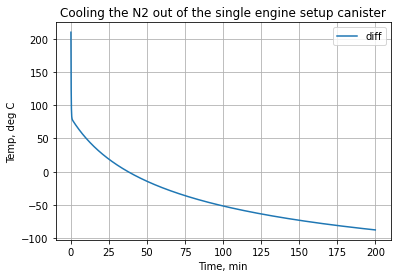

In [35]:

plt.title('Cooling the N2 out of the single engine setup canister')
# plt.plot(np.arange(1000)/30, np.array(ret1)-273.15, label='no plates')
# plt.plot(np.arange(6000)/30, ret1[:, 1]-273.15, label='lin')
# plt.plot(np.arange(6000)/30, ret2[:, 1]-273.15, label='iter')
plt.plot(np.arange(6000)/30, ret1[:, 0]-273.15a, label='diff')
plt.xlabel('Time, min')
plt.ylabel('Temp, deg C')
plt.grid()
plt.legend()

In [668]:
u1 = s.u
for j in range(105):
    lamda = min( sm.AIR_VMOLAR * 1e3 / s.volume_mole , 1 ) 
    dQ1 = 200 * 0.08 - 2 * C.sigma * (s.T - 3.15)**4
    dQ = (dQ1 * lamda) / q.mass
    s.UV = s.u + dQ, s.v

In [669]:
s.u - u1

-47.481319234662806

In [653]:
ret2[1], ret1[1]

(array([ 2.93148215e+02,  7.46251594e+05, -6.71323510e-01,  4.52570687e-02]),
 array([ 2.92956134e+02,  7.45762622e+05, -7.03919654e+01,  2.47830734e+00]))

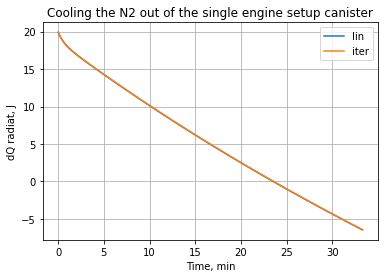

In [706]:
ret = np.array(ret)
plt.title('Cooling the N2 out of the single engine setup canister')
# plt.plot(np.arange(1000)/30, np.array(ret1)-273.15, label='no plates')
plt.plot(np.arange(1000)/30, ret1[:, 0]-273.15 , label='lin')
plt.plot(np.arange(1000)/30, ret2[:, 0]-273.15 , label='iter')
plt.xlabel('Time, min')
plt.ylabel('dQ radiat, J')
plt.grid()
plt.legend()

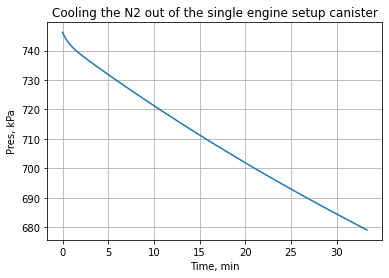

In [584]:
plt.title('Cooling the N2 out of the single engine setup canister')
# plt.plot(np.arange(1000)/30, np.array(ret1)-273.15, label='no plates')
plt.plot(np.arange(1000)/30, ret[:1000, 1]/1e3, label='with plates')
plt.xlabel('Time, min')
plt.ylabel('Pres, kPa')
plt.grid()
# plt.legend()

А ещё код подразумевает либо то, что всё пытается съебаться из *Вселенной* со скоростью в одну шестую света (судя по тому, что реликтовое излучение в коде почему-то 3.15 К, а не 2.725 К), либо дело происходит 20 тысяч (или 2 миллиарда, я запутался в константах Хаббла) лет назад / светолет отсюда.

In [601]:
2.725 * 0.99

2.69775

In [600]:
2.7 / 2.725

0.9908256880733946

In [603]:
0.01 / 0.07

0.14285714285714285

In [602]:
(3000 * 0.1e3 *3e19 / 70 / 3e8)/86400/365/1e9

0.013589910850184822

In [579]:
ret[300, 1] - ret[299, 1]

-70.85900982283056

In [194]:
200 * 0.08 - 2 * C.sigma * (s.T - 3.15)**4

-274.0040679334563

In [57]:
C.sigma*2*(293-3.15)**4

800.4513678764746

1.5274116769292887

In [369]:
3119 + 624

3743

#### Верификация
Сначала попробуем задать данные, которые дают нам $EPR \approx 1.22$.

In [12]:
# s.TP = 2360, 3321e3
s.TPX = 279, 86e3, "O2: 0.21, N2: 0.79"
q = ct.Quantity(s, moles=1)
q.moles /=q.volume / 2.5 / 15 # to be 15 cells
sm.gas_qt_epr(q)

0.021322248059522656

In [17]:
s.TPX = 3500, 4500e3, "N2: 1"
q = ct.Quantity(s, moles=1)
q.moles /=q.volume / 2.5 / 15 # to be 15 cells
sm.gas_qt_epr(q)

1.1156990263703712

In [20]:
core = sm.SupermatterCore(0, 14)
ret = []
for t in range(100000):
    ret.append([t/10., core.power, sm.gas_qt_epr(q), 
                q.P, q.T, core.damage, 
                q.moles, q.mass, *(q.X)])
    q = core.tick(q)
    q.phase.T = 2000
ret = np.array(ret)

AttributeError: attribute 'T' of 'cantera._cantera.ThermoPhase' objects is not writable

In [19]:
ret[-1, 1]

314.07800314564463

In [88]:
core = sm.SupermatterCore(0, 14)
ret = []
for t in range(1000):
    ret.append([t/10., core.power, sm.gas_qt_epr(q), 
                q.P, q.T, core.damage, 
                q.moles, q.mass, *(q.X)])
    q = core.tick(q)
ret = np.array(ret)

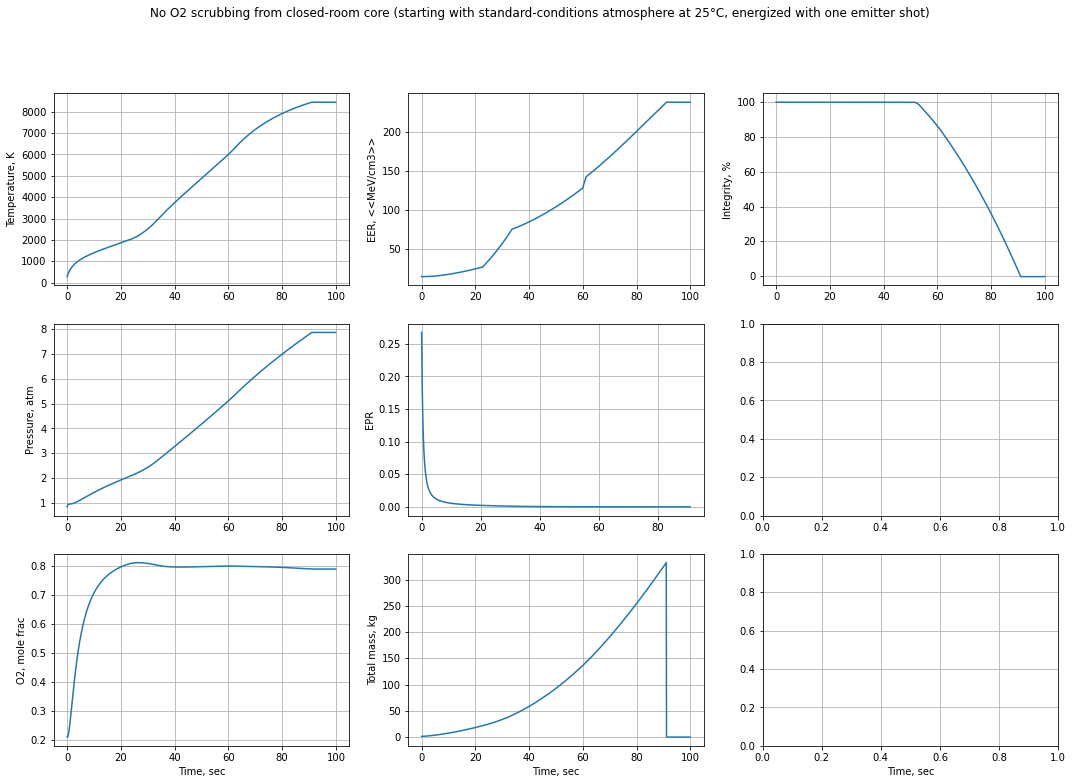

In [89]:
f, ax = plt.subplots(3, 3, figsize=(18, 12))
f.suptitle('No O2 scrubbing from closed-room core (starting with standard-conditions atmosphere at 25°C, energized with one emitter shot)')
ax[0, 0].plot(ret[:, 0], ret[:, 4])
ax[0, 0].set_ylabel('Temperature, K')
ax[1, 0].plot(ret[:, 0], ret[:, 3]/101325)
ax[1, 0].set_ylabel('Pressure, atm')
ax[2, 0].plot(ret[:, 0], ret[:, 9])
ax[2, 0].set_ylabel('O2, mole frac')
ax[2, 0].set_xlabel('Time, sec')

ax[0, 1].plot(ret[:, 0], ret[:, 1])
ax[0, 1].set_ylabel('EER, <<MeV/cm3>>')
ax[1, 1].plot(ret[:, 0], ret[:, 2])
ax[1, 1].set_ylabel('EPR')
ax[2, 1].plot(ret[:, 0], ret[:, 6])
ax[2, 1].set_ylabel('Total mass, kg')
ax[2, 1].set_xlabel('Time, sec')

ax[0, 2].plot(ret[:, 0], (1 - ret[:, 5])*100)
ax[0, 2].set_ylabel('Integrity, %')

ax[2, 2].set_xlabel('Time, sec')

# ax[1, 2].plot(ret[:, 0], np.cumsum(ret[:, 10] * 0.032))
# ax[1, 2].set_ylabel('O2, kg scrubbed total')
# ax[1, 2].set_xlabel('Time, sec')

for k in ax:
    for c in k:
        c.grid(True)